# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. 

We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016.

# Get the Data

In this section we will use pandas to directly read data from Google finance.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

In [3]:
BAC = data.DataReader('BAC', 'yahoo', start, end)
C = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

a list of the ticker symbols (as strings) in alphabetical order.

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers.sort()

Concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584072  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227390  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270195  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220253  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241669  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583351  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680927  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717518  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095604  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242825  
2006-01-04   31.799999  31.530001  10870000.0  20.008026  
2006-01-05   31.500000  31.495001  10158000.0  19.985817  
2006-01-06   31.580000  31.680000   8403800.0  20.103214  
2006-01-09   31.674999  31.674999   5619600.0  20.100039  

[5 rows x 36 columns]

# EDA

Let's explore the data using Multi-Level Indexing.

What is the max Close price for each bank's stock throughout the time period?

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

#bank_stocks.loc[bank_stocks.index,'BAC':'WFC',].max().xs('Close', level=1)

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [10]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()
#returns = bank_stocks.xs(key = 'Close',axis = 1, level = 'Stock Info')
#returns = returns.rename(columns = {'BAC': 'BAC returns', 'C' :'C returns', 'CS':'CS returns',
                   # 'JPM':'JPM returns', 'MS':'MS returns', 'WFC':'WFC returns'})
#returns.pct_change()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Create a pairplot using seaborn of the returns dataframe.

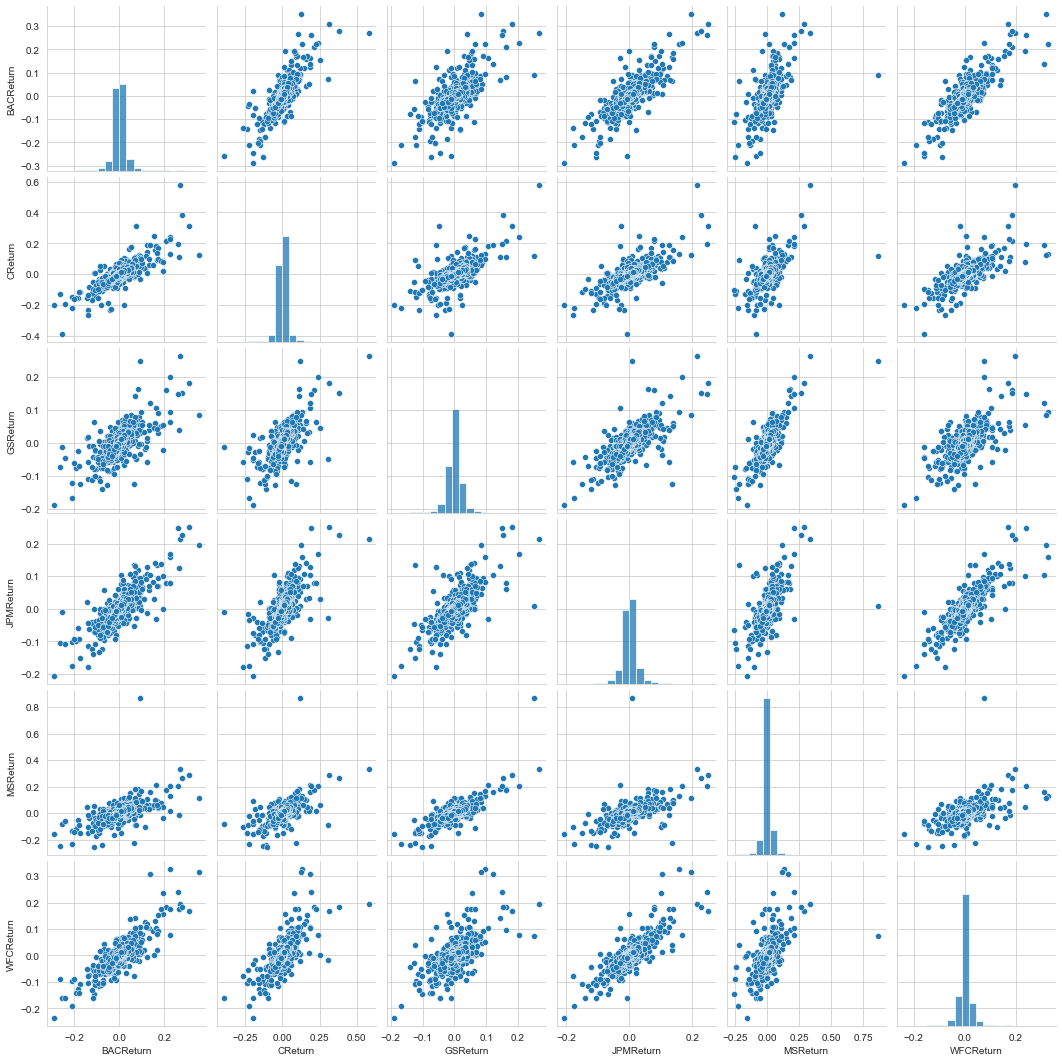

In [11]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(data = returns[1:],kind = 'scatter',diag_kind = 'hist',
            diag_kws = dict(bins = 20))

Use this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [12]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, and for the year 2015.

In [14]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [15]:
returns[returns.index.year == 2015].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

 Create a distplot using seaborn of the 2015 returns for Morgan Stanley

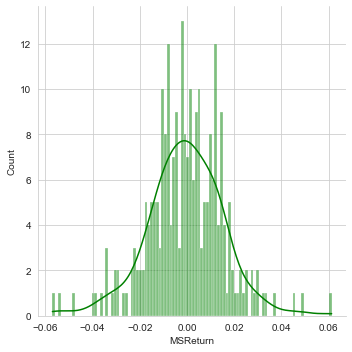

In [16]:
sns.displot(returns[returns.index.year == 2015]['MSReturn'],bins = 100, kde = True,
           color ='green')

Create a distplot using seaborn of the 2008 returns for CitiGroup

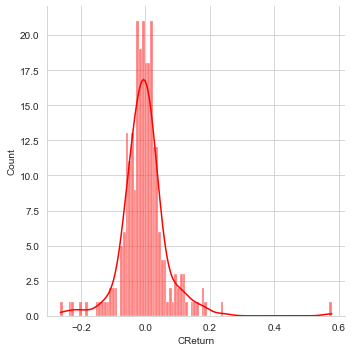

In [17]:
sns.displot(returns[returns.index.year == 2008]['CReturn'],
           bins = 100, kde = True, color = 'red')

# More Visualization



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
cf.go_offline()
init_notebook_mode(connected=True)

Create a line plot showing Close price for each bank for the entire index of time.

<AxesSubplot:xlabel='Date'>

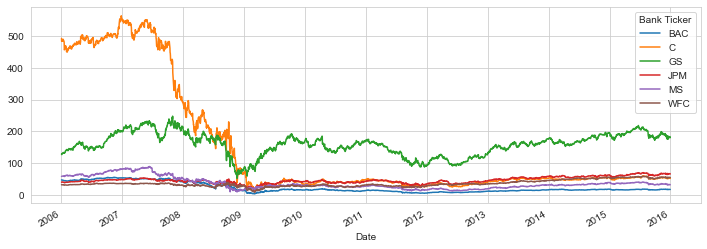

In [19]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot(
figsize = (12,4))

In [20]:
#Interactive plot using plotly

bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

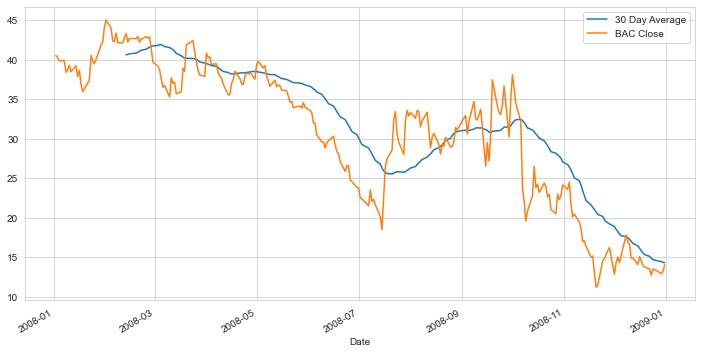

In [21]:
plt.figure(figsize=(12,6))
bank_stocks[bank_stocks.index.year == 2008]['BAC']['Close'].rolling(window =30).mean().plot(label= '30 Day Average')
bank_stocks[bank_stocks.index.year == 2008]['BAC']['Close'].plot(label='BAC Close')
plt.legend()

Create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

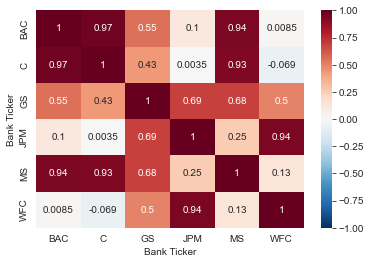

In [22]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),
           annot = True,cmap ='RdBu_r', vmin = -1.0, vmax = 1.0)

Create a clustermap of the correlation between the stocks Close Price.

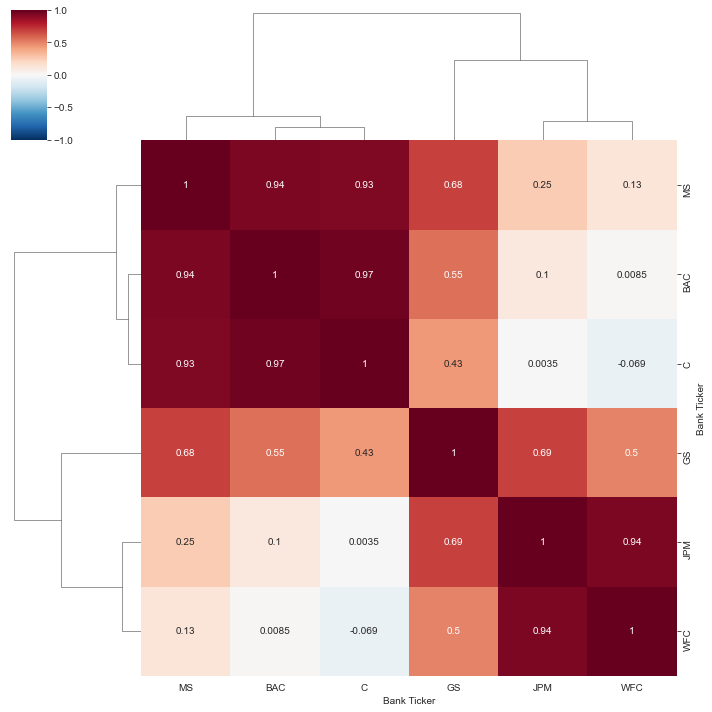

In [23]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),
           annot = True,cmap ='RdBu_r', vmin = -1.0, vmax = 1.0)

Create an interactive heatmap of the correlation between the stocks Close Price.

In [24]:
close_corr = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdbu')

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [28]:
bank_stocks[bank_stocks.index.year == 2015]['BAC'].iplot(kind = 'candle')

Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [34]:
bank_stocks[bank_stocks.index.year == 2015]['MS']['Close'].ta_plot(study = 'sma',
                                                         periods=[13,21,55],
                                                         title = 'Simple Moving Averages')

Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

In [33]:
bank_stocks[bank_stocks.index.year == 2015]['BAC']['Close'].ta_plot(study = 'boll')